# Preprocessing for all signals

# Plot 

In [147]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [191]:
file = "2025-11-12_19-13-50-783.csv"
#file = "2025-11-12_19-13-50-783.csv"

In [192]:
df = pd.read_csv(file)
df

,CH1,CH2,CH3,time,Ts
0,-0.004016,-0.008000,-0.318594,0.000000e+00,2.000000e-09
1,-0.010094,-0.005969,-0.302187,2.000000e-09,NaN
2,-0.018000,-0.005000,-0.400625,4.000000e-09,NaN
3,-0.013969,-0.005984,-0.361406,6.000000e-09,NaN
4,-0.010000,-0.008000,-0.279687,8.000000e-09,NaN
...,...,...,...,...,...
9995,0.414000,0.338992,7.859844,1.999000e-05,NaN
9996,0.418000,0.338992,7.859844,1.999200e-05,NaN
9997,0.414141,0.338992,7.859844,1.999400e-05,NaN
9998,0.409969,0.338992,7.859844,1.999600e-05,NaN


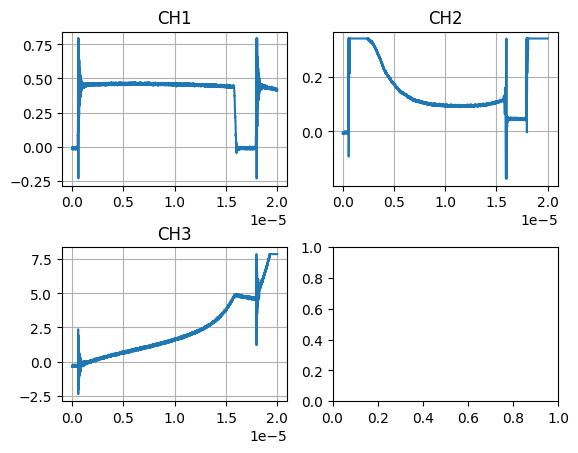

In [193]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.4, wspace=None) 
axs  = axs.flatten()
i=0
for c in df.columns:
    if "CH" in c: 
        
        axs[i].plot(df.time, df[c])
        axs[i].set_title(c)
        axs[i].grid()
        i=i+1
    #print(c)

In [194]:
Ts=  df.loc[0, "Ts"]
Ts

np.float64(2e-09)

In [152]:
df.columns

Index(['CH1', 'CH2', 'CH3', 'time', 'Ts'], dtype='object')

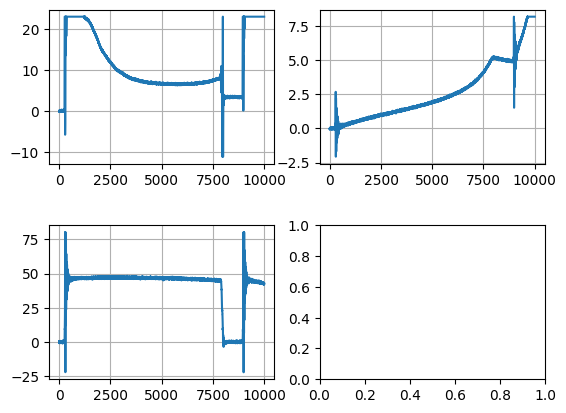

In [153]:
R= 0.0150 # R150
ID = (df["CH2"]/R).values# V = r*i
ID = ID -ID [:200].mean()
time = df.time.values
vds= df.CH1.values*100 # 1/100 sonde 
vds= vds -vds[:200].mean()
IL= (df.CH3) .values # mA
IL = IL -IL[:200].mean()
#plt.plot(time, ID) 
#plt.plot(time, IL)

arr=[ID, IL, vds]

fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.4, wspace=None) 
axs  = axs.flatten()
for i in range(len(arr)):
    axs[i].plot(arr[i])
    axs[i].grid()



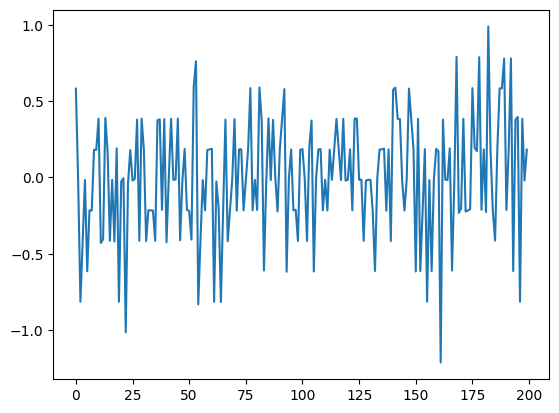

In [154]:
plt.plot(vds[:200])

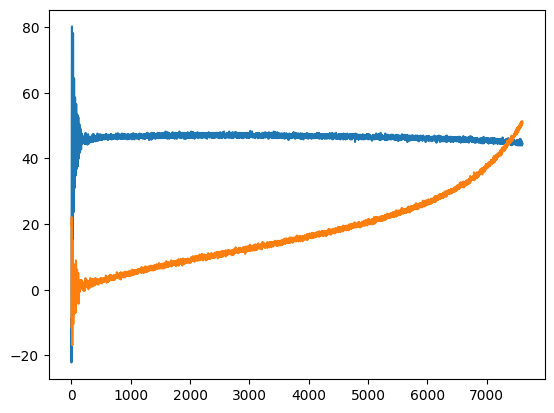

In [155]:
ns=200+100
ne= 8000-100
VDS2= vds[ns:ne]
IL2 = IL[ns:ne]
plt.plot(VDS2)
plt.plot(IL2*10)

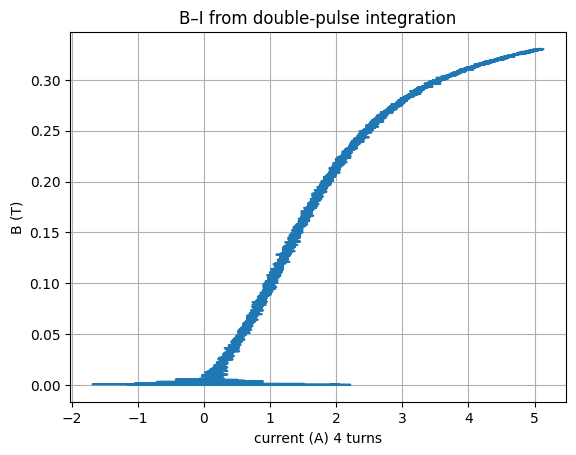

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(VDS2) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae                                      # T

# (Optional) realign so B(0)=0
#B = B - B[0]
B = B

# ----- Plot B vs I -----
plt.figure()
plt.plot(IL2, B)
plt.grid(True)
plt.xlabel(f"current (A) {N} turns")
plt.ylabel("B (T)")
plt.title("B–I from double-pulse integration")
plt.show()

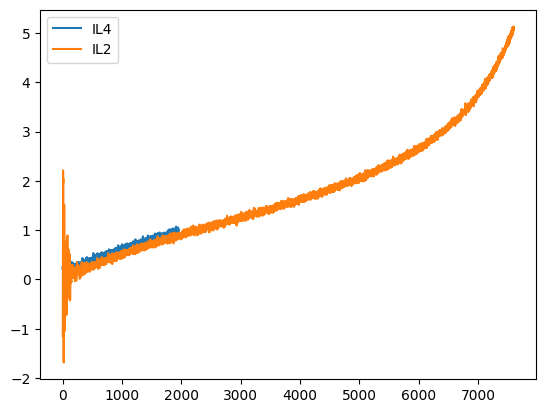

219.14423779756396 13696.514862347747
42.67202981612236 %


(np.float64(0.00021914423779756395), np.float64(-1.6094749865894475e-05))

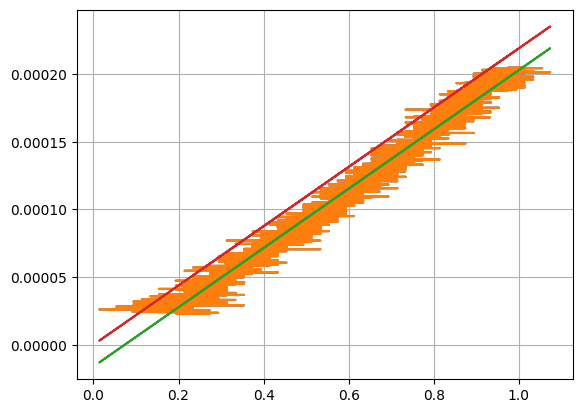

In [157]:
# V = L di/dt 
# V*dt = L di 
# if L constant 
# Flux_link = integ(V*dt) = L integ(di) = L i 
n1= 250
n2 = 2200
#n1= 0
#n2 = len(IL2)
IL4 = IL2[n1: n2]
time4 = np.arange (0,len(IL4)*Ts,Ts)

Lam4 = lambda_linkage[n1:n2]
VDS4 = VDS2[n1:n2]
#Lam4  = Lam4-Lam4[0]
#IL4 = IL4-IL4[0]
plt.plot(IL4, label ="IL4")
plt.plot(IL2, label = "IL2")
plt.legend()
plt.show()
plt.plot(IL4, Lam4)


from sklearn.linear_model import  LinearRegression as LR 


x = IL4.reshape(-1, 1)
y = Lam4

lr = LR()
lr.fit(x, y)
a = lr.coef_[0]
b = lr.intercept_
plt.plot(IL4, Lam4)
plt.plot(IL4, IL4*a+b)
plt.plot(IL4, IL4*a)

L_uH = 1e6*a
# L = Al *N**2
Al_nH = (L_uH /N**2) *1000
print(L_uH, Al_nH)

Al_nH_nom = 9600 # N97 AL = 9600 25% 
error = 100*(Al_nH-Al_nH_nom) /Al_nH_nom
print(error, "%")
plt.grid()
a, b

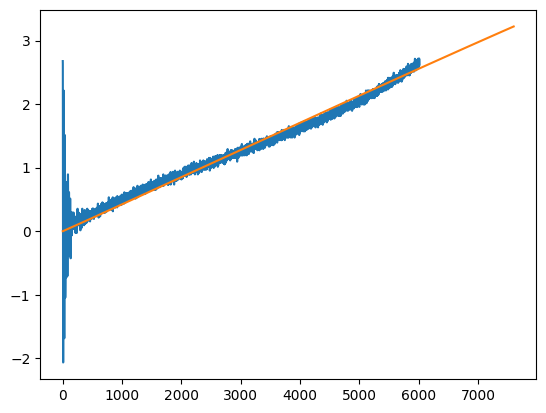

In [165]:
# v = L di/dt 
Ical = np.cumsum(VDS2) * Ts  /((L_uH)*1e-6)  
time3 = np.arange (0,len(Ical)*Ts,Ts)

plt.plot(IL3, label ="IL4")
plt.plot(Ical , label ="Ical")

In [159]:
Al_nH = (L_uH /N**2) *1000
Al_nH , L_uH

(np.float64(13696.514862347747), np.float64(219.14423779756396))

In [160]:
Al_nH = (2*L_uH /N**2) *1000
Al_nH_nom, Al_nH , L_uH

(9600, np.float64(27393.029724695494), np.float64(219.14423779756396))

In [172]:
vds[:200].mean(), IL[:200].mean()

(np.float64(7.993605777301127e-17), np.float64(4.884981308350689e-17))

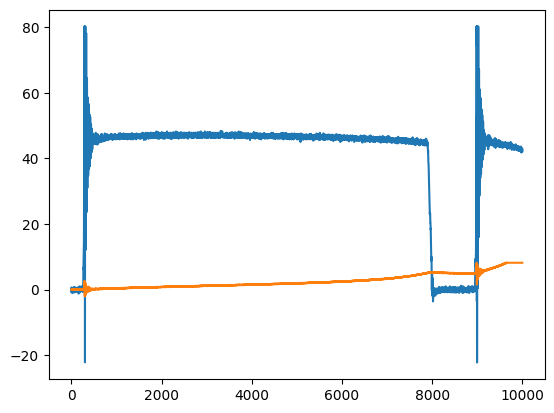

In [173]:
plt.plot(vds)
plt.plot(IL)

In [178]:
1e3*L_uH/4**2, Al_nH_nom,N

(np.float64(13696.514862347747), 9600, 4)

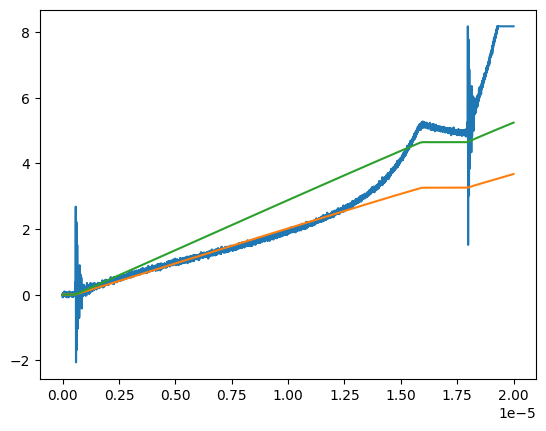

In [184]:
Ical = np.cumsum(vds) * Ts  /((L_uH)*1e-6)  
Icalnom = np.cumsum(vds) * Ts  /( 1e-9*Al_nH_nom*N**2)
plt.plot(time, IL)
plt.plot(time,Ical)
plt.plot(time,Icalnom)

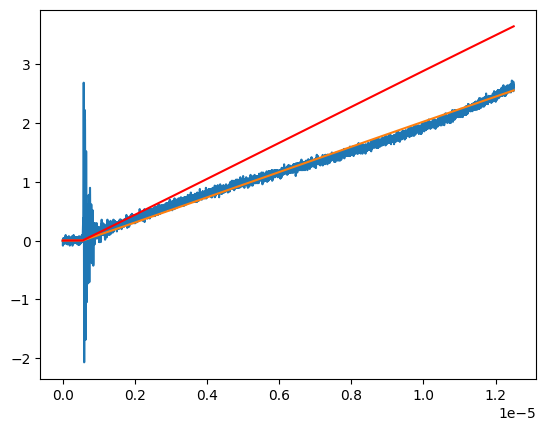

In [197]:
mask  =time<=1.25e-5

Ical = np.cumsum(vds) * Ts  /((L_uH)*1e-6)  
Icalnom = np.cumsum(vds) * Ts  /( 1e-9*Al_nH_nom*N**2)
plt.plot(time[mask], IL[mask])
plt.plot(time[mask],Ical[mask])
plt.plot(time[mask],Icalnom[mask], c="r")

https://www.tdk-electronics.tdk.com/download/531632/dbcde584d155cc270f5d5dbf1efec233/pdf-generaldefinitions.pdf

page 3 


BS is defined as the flux density at a field strength of H = 1200 A/m. 

ELP 120 20 38

https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf

In [201]:
mask  =time<=1.5e-5


time_= time[mask]
IL_ = IL[mask]
vds_= vds[mask]




# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(vds_) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  



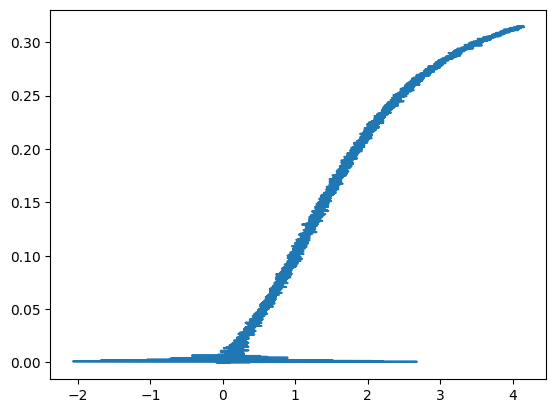

In [210]:
plt.plot(IL_, B)
# phi = B*A = L*i 
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)

304.7746755662612 mT


(-100.0, 1473.548370462046)

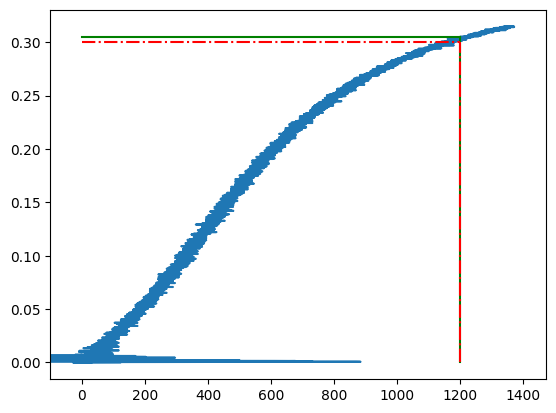

In [237]:
le_mm = 121.2 #mm ELP 102/20/38 with I 102/7/38
le=le_mm *1e-3 # m
H = N*IL_/le


H_= 10*H
Hsat =1200
i = np.argmin(np.abs(H_-Hsat))
Bsat_cal = B[i]
print(Bsat_cal*1000, "mT") # 304.7746755662612 mT
plt.plot(H_, B)
plt.plot([Hsat, Hsat], [0,Bsat_cal], c="g")
plt.plot([0, Hsat], [Bsat_cal,Bsat_cal], c="g")

plt.plot([Hsat, Hsat], [0,0.3], c="r", linestyle="-.")
plt.plot([0, Hsat], [0.3,0.3], c="r", linestyle="-.")
# phi = B*A = L*i 
plt.xlim([-100,None])
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)

In [224]:
N, IL_.max(), le

(4, np.float64(4.153859375), 0.1212)

In [276]:
from math import pi , sqrt 

#lets verify our cal from datasheet 
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
Ae = 534.2e-6 # m2 (mm2 to m2)
le = 121.2e-3# mm => m
AL = 9600 # nH N96 +/- 25% 
N = 4 
mu_e = 1740 
mu_0 =  4*pi *10**-7 #μ 0 = 4 π ∗ 10 − 7 H / m
Bsat = 0.3 # T 
Hsat = 1200 # A/m
# Amplere theroy 
# B = mu_e * mu0 * N*I / le 
# H = N*I / le 
# So B/H = mu_e*mu0
Bsat/Hsat , mu_e*mu_0
# (0.00025, 0.002186548486898496)

(0.00025, 0.002186548486898496)

# DRAFT filter 

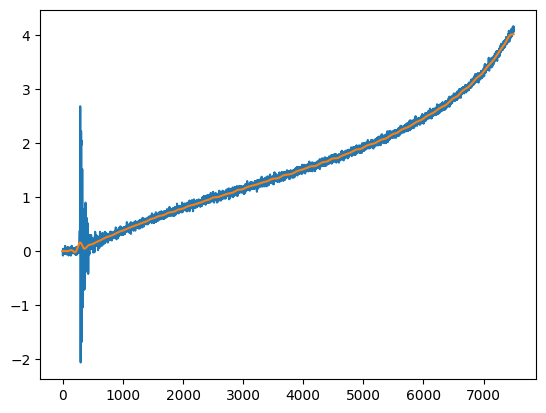

In [277]:
import numpy as np
from scipy.signal import butter, sosfiltfilt

#Ts = 4e-9           # 4 ns
Fs = 1 / Ts         # 250 MHz
fc = 4e6         # 200 kHz
wn = fc / (Fs/2)    # normalized cutoff

# Zero-phase low-pass (Butterworth IIR + filtfilt)
sos = butter(6, wn, btype='low', output='sos')  # order 6 is a good start
IL_filt = sosfiltfilt(sos, IL_)                # zero group delay
plt.plot(IL_)
plt.plot(IL_filt)

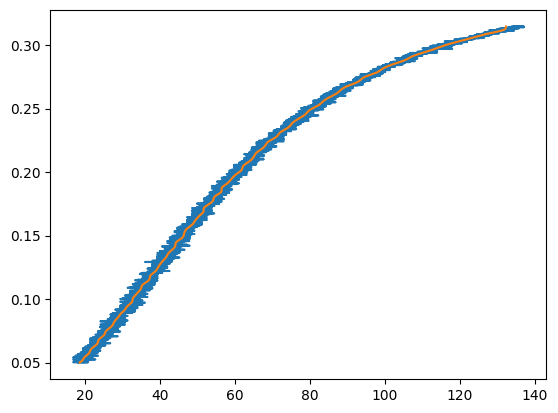

In [278]:
mask = B> 0.05
B2 = B[mask ]



Hf = N*IL_filt/le
H2 = H[mask]
Hf2 = Hf[mask]
plt.plot(H2, B2)
plt.plot(Hf2, B2)

Text(0.5, 1.0, 'mu_r')

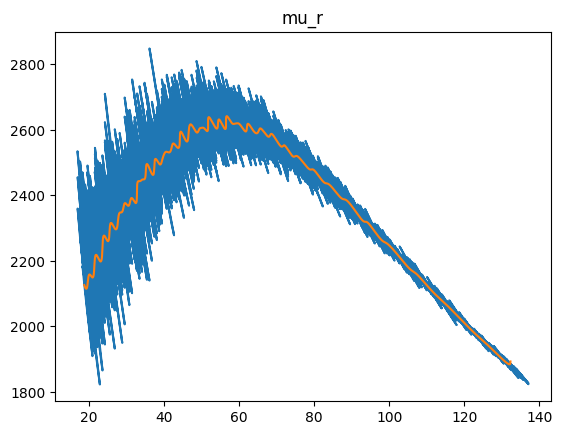

In [290]:
#Bsat/Hsat  =  mu_e*mu_0
plt.plot(H2, B2/(H2*mu_0))
plt.plot(Hf2, B2/(Hf2*mu_0))
plt.title("mu_r")

Text(0.5, 1.0, 'mu_r')

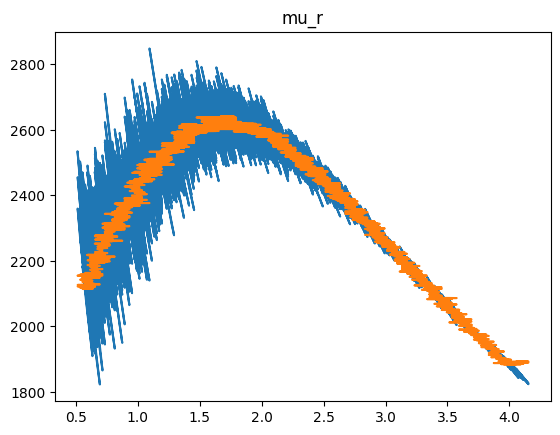

In [292]:
#Bsat/Hsat  =  mu_e*mu_0
IL2 = IL_[mask]

plt.plot(IL2, B2/(H2*mu_0))
plt.plot(IL2, B2/(Hf2*mu_0))
plt.title("mu_r")